## Matplotlib
is a graphics library, designed for scientific computing, with

+ high quality 2D and 3D plots
+ output in all the usual formats (PDF, PNG, etc.)
+ LaTeX integration
+ animation, etc.


#### Matplotlib offers two quite different application programming interfaces (API) for plotting:

+  MATLAB-like interface
+  Object oriented interface


### MATLAB-style API 
Uses the the pylab module to instruct the interpreter to pull in some key functionality from matplotlib and numpy

In [1]:
# Import pyplot and numpy into a single namespace
from pylab import *  # also performs "from numpy import *"

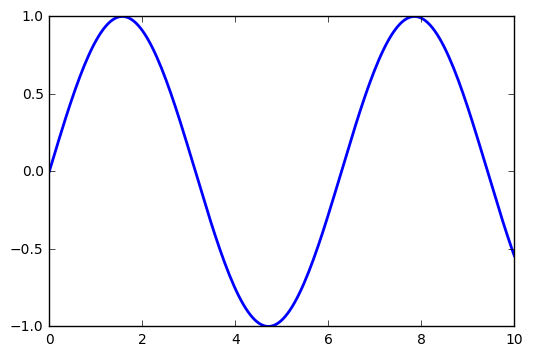

In [2]:
x = linspace(0, 10, 200)
y = sin(x)
plot(x, y, 'b-', linewidth=2)
show()

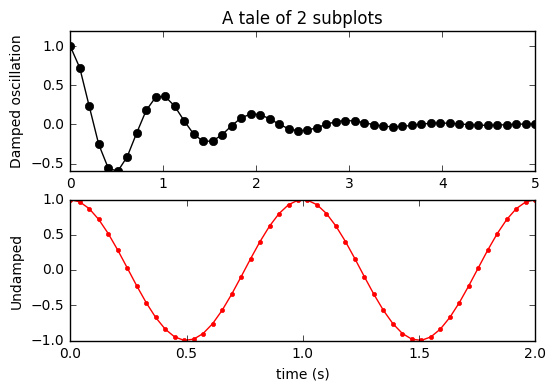

In [3]:
x1 = linspace(0.0, 5.0)
x2 = linspace(0.0, 2.0)

y1 = cos(2 * pi * x1) * exp(-x1)
y2 = cos(2 * pi * x2)

subplot(2, 1, 1)
plot(x1, y1, 'ko-')
title('A tale of 2 subplots')
ylabel('Damped oscillation')

subplot(2, 1, 2)
plot(x2, y2, 'r.-')
xlabel('time (s)')
ylabel('Undamped')

show()

### The Object-Oriented API

In [41]:
# Numerical library
import numpy as np

# Import pyplot for plotting (standard form of the import)
import matplotlib.pyplot as plt

# Magic function to make matplotlib inline
%matplotlib inline

<img src="matplotlib-anatomy.png" alt="Drawing" style="width: 600px;"/>

Remember: 

1. Figure is the final image that may contain 1 or more axes...like a blank canvas
2. Axes represent an individual plot...think of a frame for plotting in.

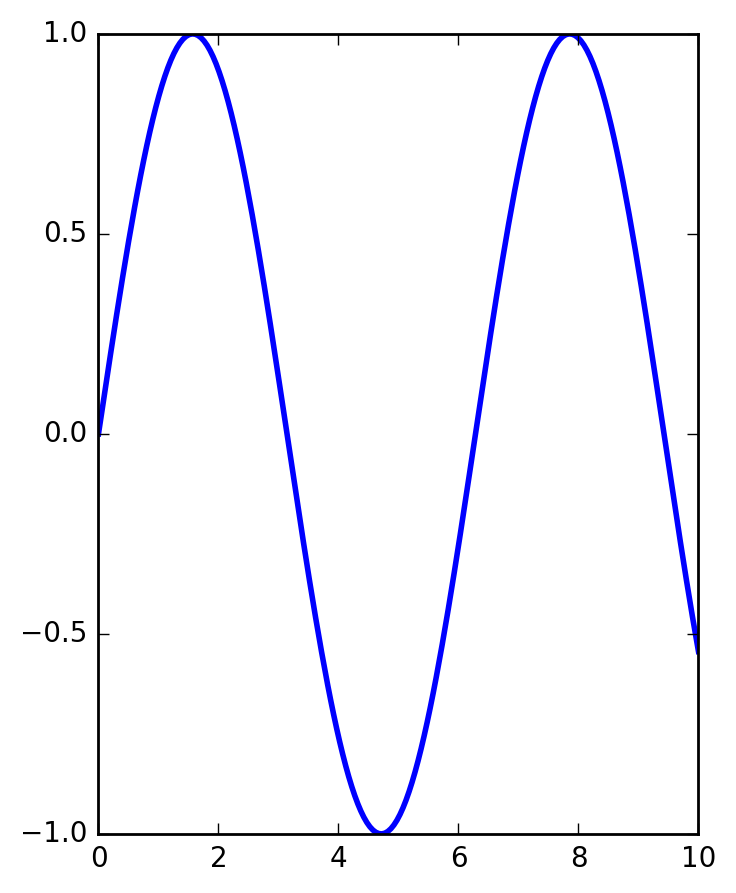

In [5]:
x = np.linspace(0, 10, 200)
y = np.sin(x)
fig = plt.figure()
# add_axes: [x_lo, y_lo, width, height] values between 0-1 in "figure dimensions"
ax = fig.add_axes([0, 0, 0.5, 1])           
ax.plot(x, y, 'b-', linewidth=2)    # note that plot is a method of ax


### Tweaks

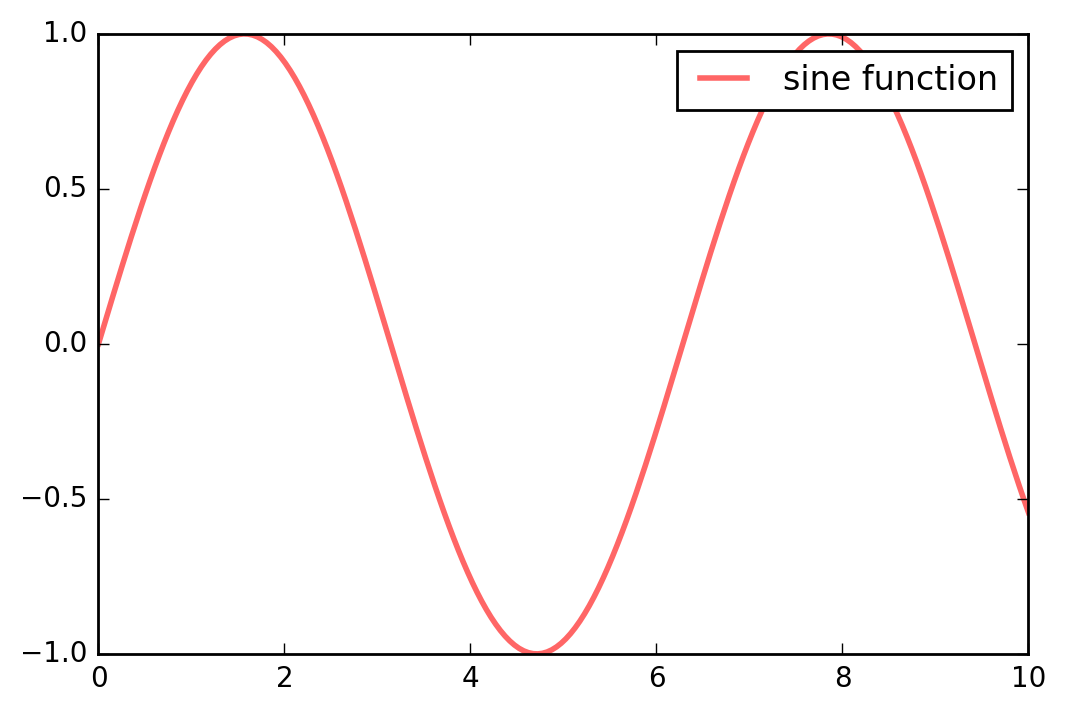

In [6]:
# subplot creates a grid of axes 
# freeing us from creating axes coordinates manually
fig, ax = plt.subplots() 
# Generally: subplot(nrows, ncols, nsubplot)
x = np.linspace(0, 10, 200)
y = np.sin(x)
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
# alpha makes the line slightly transparent - which makes it look smoother
ax.legend()

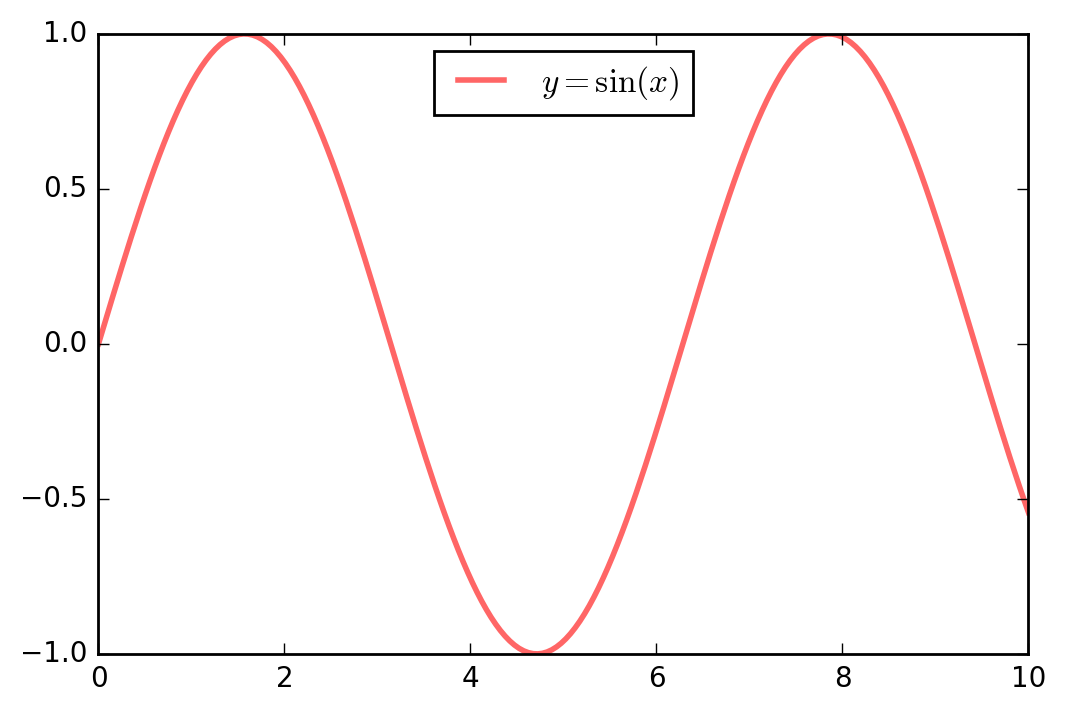

In [7]:
# Add LaTeX

fig, ax = plt.subplots()
x = np.linspace(0, 10, 200)
y = np.sin(x)
ax.plot(x, y, 'r-', linewidth=2, label=r'$y=\sin(x)$', alpha=0.6)
# r in front of the label string tells Python that this is a raw string
ax.legend(loc='upper center')

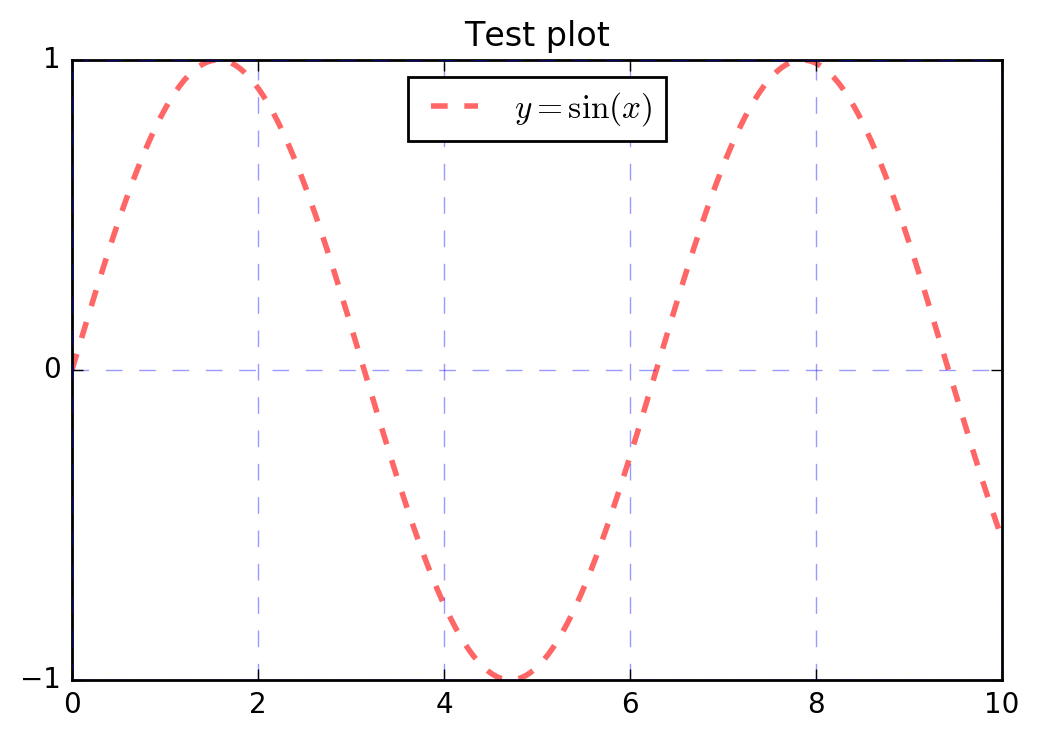

In [8]:
# Controlling the ticks and legend, adding titles and grid

fig, ax = plt.subplots()
x = np.linspace(0, 10, 200)
y = np.sin(x)
ax.plot(x, y, 'r--', linewidth=2, label=r'$y=\sin(x)$', alpha=0.6)
ax.legend(loc='upper center')
ax.set_yticks([-1, 0, 1])
ax.set_title('Test plot')
ax.grid(color='b', alpha=0.4, linestyle='dashed', linewidth=0.5)

### Multiple Plots on One Axis

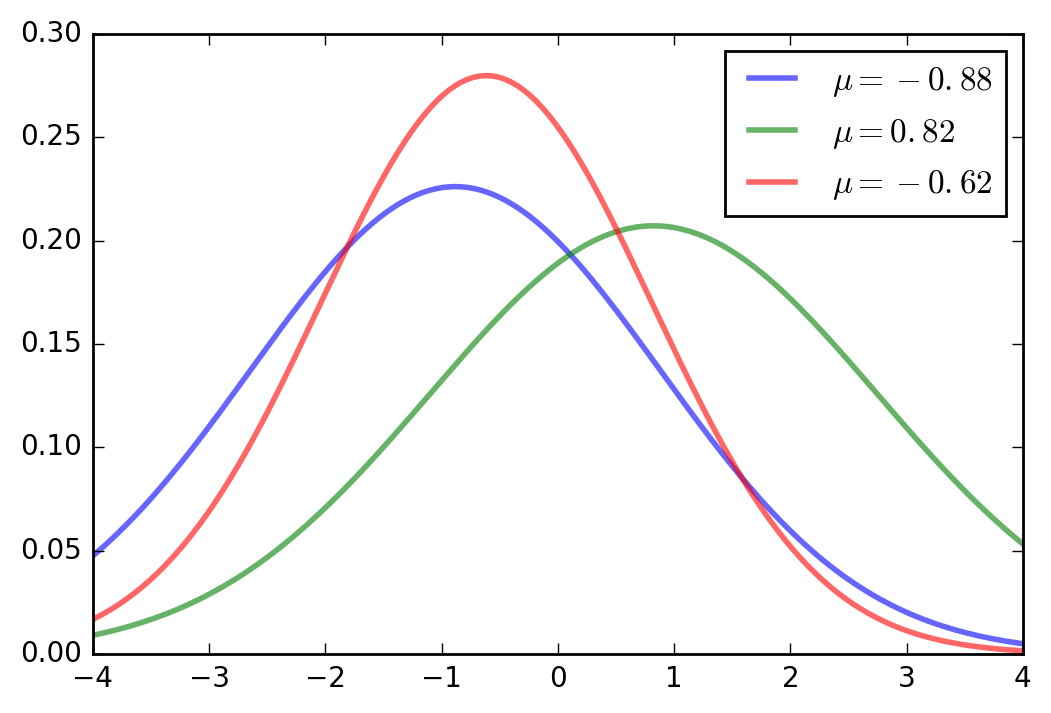

In [9]:
from scipy.stats import norm
from random import uniform

fig, ax = plt.subplots()
x = np.linspace(-4, 4, 150)
for i in range(3):
    m, s = uniform(-1, 1), uniform(1, 2)
    y = norm.pdf(x, loc=m, scale=s)
    current_label = r'$\mu = {0:.2f}$'.format(m)
    ax.plot(x, y, linewidth=2, alpha=0.6, label=current_label)
ax.legend()

### Multiple Subplots

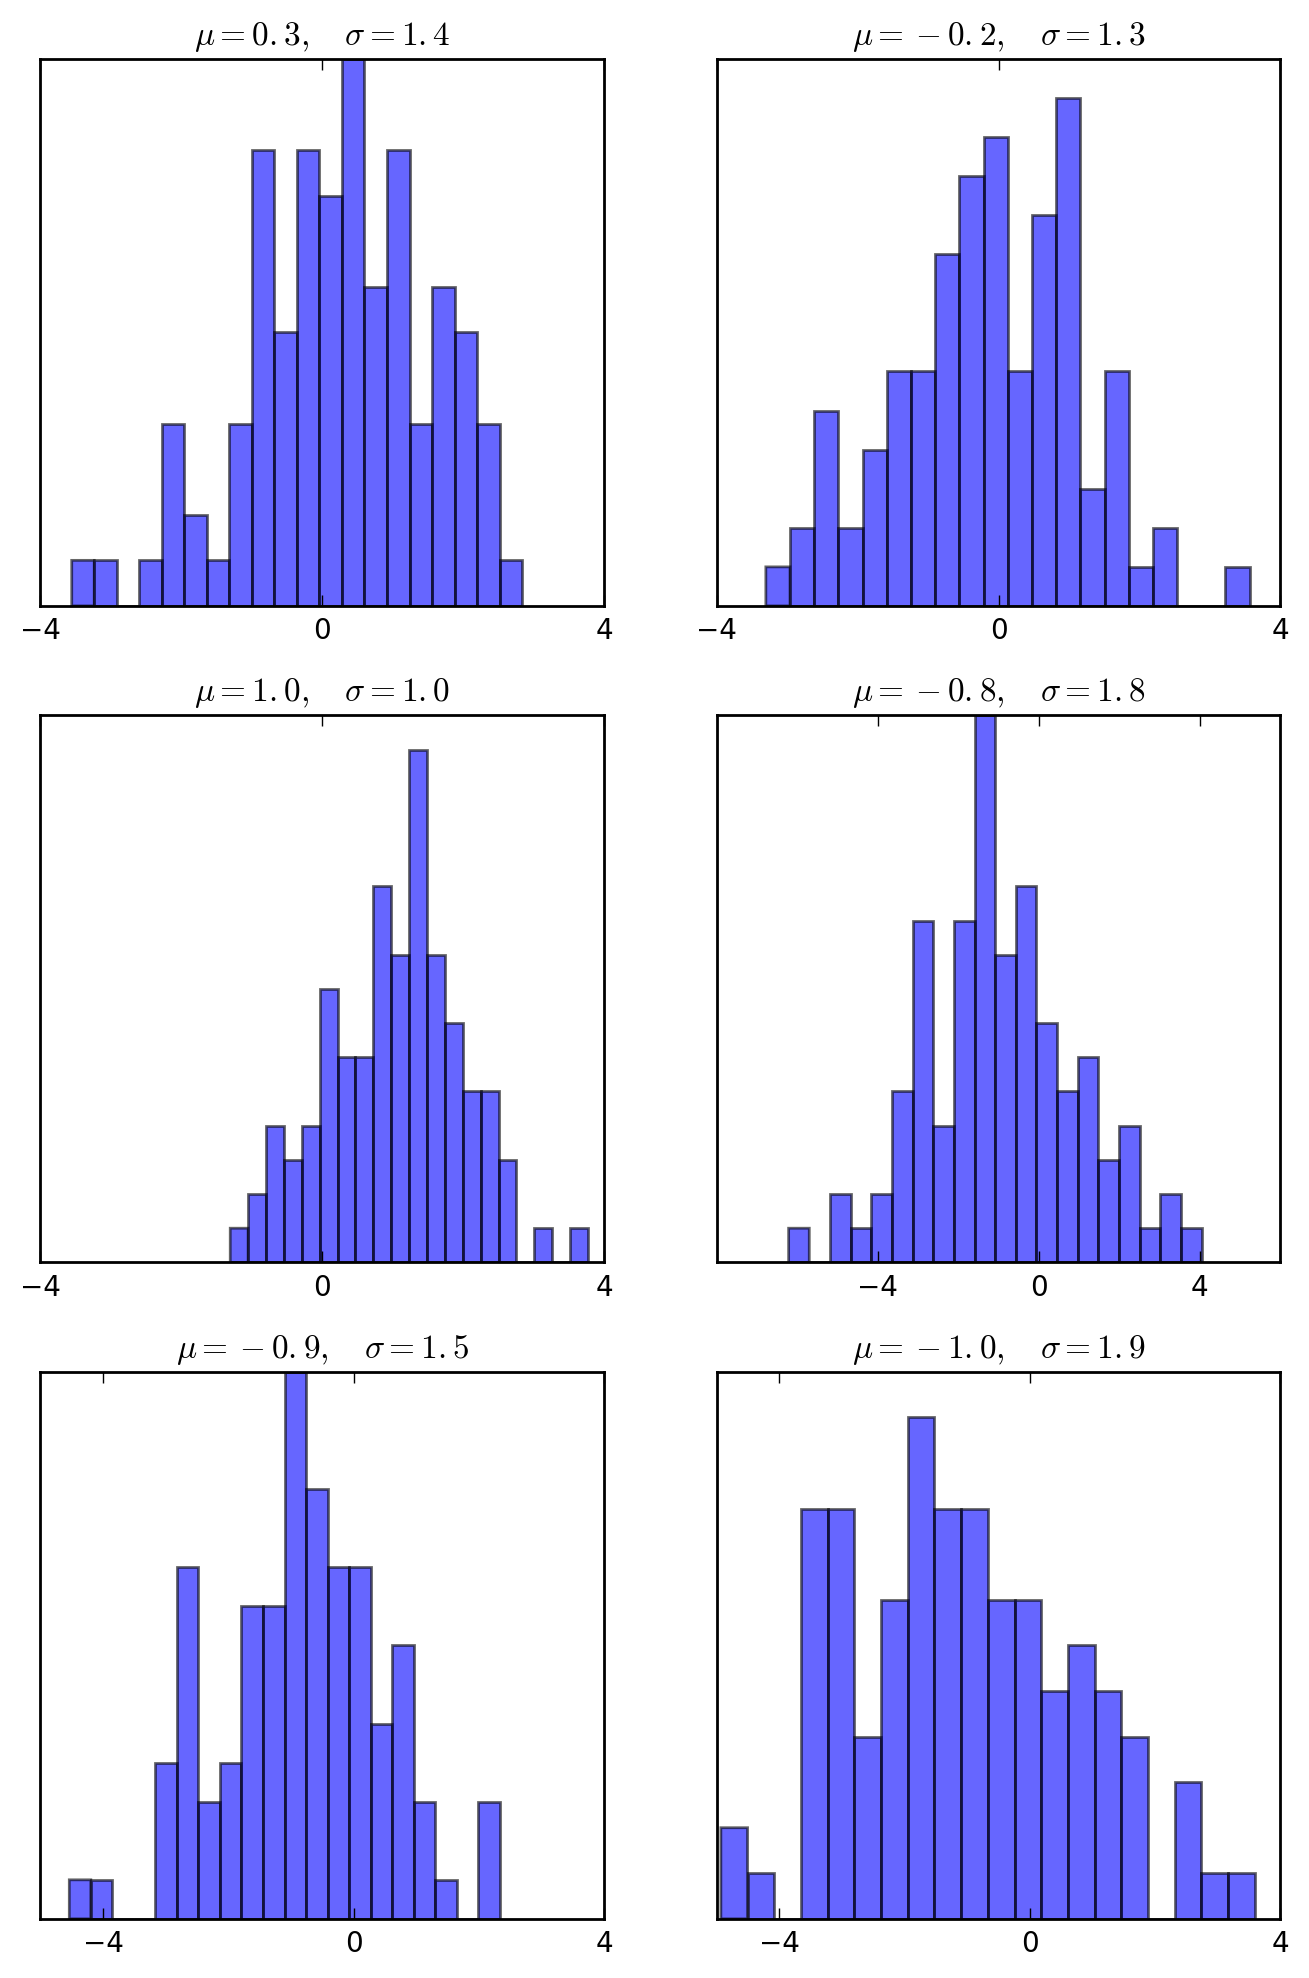

In [10]:
num_rows, num_cols = 3, 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 12))
for i in range(num_rows):
    for j in range(num_cols):
        m, s = uniform(-1, 1), uniform(1, 2)
        x = norm.rvs(loc=m, scale=s, size=100)
        axes[i, j].hist(x, alpha=0.6, bins=20)
        t = r'$\mu = {0:.1f}, \quad \sigma = {1:.1f}$'.format(m, s)
        axes[i, j].set_title(t)
        axes[i, j].set_xticks([-4, 0, 4])
        axes[i, j].set_yticks([])

### 3D Plots

In [11]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

def f(x, y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)

$$
\begin{align}
z = \frac{cos(x^2 + y^2)}{1 + x^2 + y^2}
\end{align}
$$


(-0.5, 1.0)

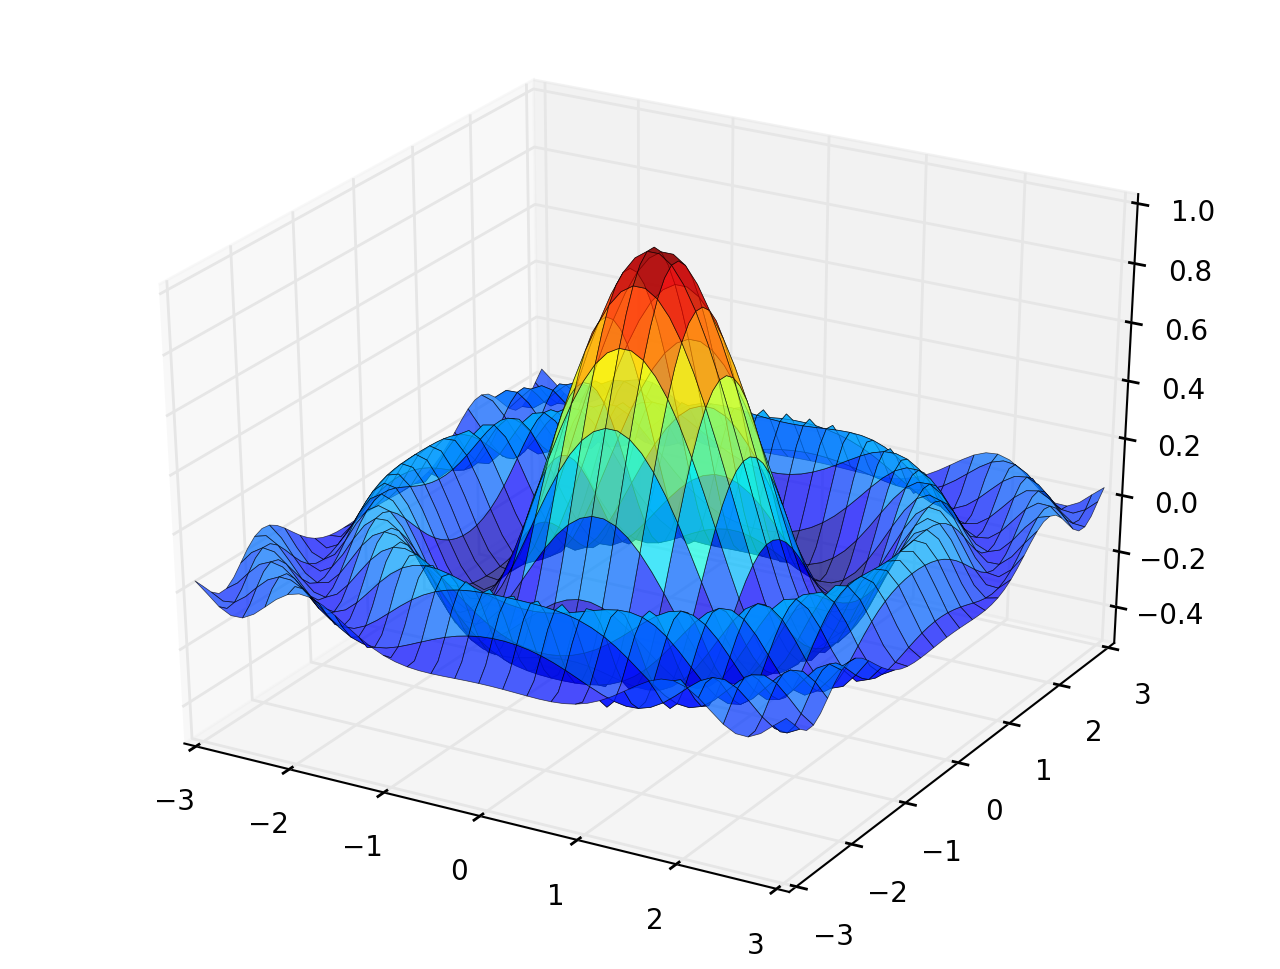

In [12]:
xgrid = np.linspace(-3, 3, 50)
ygrid = xgrid
x, y = np.meshgrid(xgrid, ygrid)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,
                y,
                f(x, y),
                rstride=2, cstride=2,
                cmap=cm.jet,
                alpha=0.7,
                linewidth=0.25)
ax.set_zlim(-0.5, 1.0)

#### Reference:

[Matplotlib gallery](http://matplotlib.org/gallery.html)

In [13]:
def lorenz_attractor(r, t, p):
    """
    Compute the right hand side of system of ODEs for Lorenz attractor.
    
    Parameters
    ----------
    r : array_like, shape (3,)
        (x, y, z) position of trajectory.
    t : dummy_argument
        Dummy argument, necessary to pass function into 
        scipy.integrate.odeint
    p : array_like, shape (3,)
        Parameters (s, k, b) for the attractor.
        
    Returns
    -------
    output : ndarray, shape (3,)
        Time derivatives of Lorenz attractor.
        
    Notes
    -----
    .. Returns the right hand side of the system of ODEs describing
       the Lorenz attractor.
        x' = s * (y - x)
        y' = x * (k - z) - y
        z' = x * y - b * z
    """
    # Unpack variables and parameters
    x, y, z = r
    s, p, b = p
    
    return np.array([s * (y - x), 
                     x * (p - z) - y, 
                     x * y - b * z])


Exercise:
Complete the followiing code to make plots of the Lorenz attractor.

In [ ]:
import scipy.integrate

# Parameters to use
p = np.array([10.0, 28.0, 8.0 / 3.0])

# Initial condition
r0 = np.array([0.1, 0.0, 0.0])

# Create an array of 10000 time values such that t = [0,80]
t = ----
# Use scipy.integrate.odeint to integrate Lorentz attractor
r = scipy.integrate.odeint(lorenz_attractor, r0, t, args=(p,))

# Unpack results into x, y, z.
x, y, z = r.transpose()

# Plot x vs z (red-dashed line, use linewidth=0.5)
----
# Add labels (fontsize=18) and title
----
----
----
# Optional: Repeat plot for x vs y, y vs z - plot all three in a 1x3 sunplot

### Visualizing earth science datasets

Common data formats:

+ Text
+ Flat binary
+ NetCDF
+ Grib
+ HDF5

### Using Pandas

In [15]:
import pandas as pd
pd.set_option("max_rows", 10) # only 10 rows of data will be displayed
np.set_printoptions(suppress=True)
LARGE_FIGSIZE = (8, 6) # set figure size



In [16]:
# Nice graphics
#import seaborn as sns
# Seaborn settings for notebooks
#rc = {'lines.linewidth': 2, 
#      'axes.labelsize': 18, 
#      'axes.titlesize': 18, 
#      'axes.facecolor': 'DFDFE5'}
#sns.set_context('talk', rc=rc)
#sns.set_style('darkgrid', rc=rc)
#sns.set(style='ticks', context='notebook')

In [17]:
!head GLB.Ts+dSST.txt

        GLOBAL Land-Ocean Temperature Index in 0.01 degrees Celsius   base period: 1951-1980

                    sources:  GHCN-v3 1880-10/2016 + SST: ERSST v4 1880-10/2016
                    using elimination of outliers and homogeneity adjustment
                    Notes: 1950 DJF = Dec 1949 - Feb 1950 ;  ***** = missing

                                                                     AnnMean
Year   Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec    J-D D-N    DJF  MAM  JJA  SON  Year
1880   -30  -21  -18  -27  -14  -28  -23   -7  -17  -16  -19  -22    -20 ***   ****  -20  -20  -17  1880
1881   -10  -14    1   -4   -5  -29   -7   -3   -9  -20  -27  -16    -12 -12    -15   -3  -13  -19  1881


In [18]:
# Import data into a Pandas DataFrame
giss_temp = pd.read_table("GLB.Ts+dSST.txt", sep="\s+", skiprows=7,
                          skip_footer=11, engine="python")
giss_temp

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON,Year.1
0,1880,-30,-21,-18,-27,-14,-28,-23,-7,-17,-16,-19,-22,-20,***,****,-20,-20,-17,1880
1,1881,-10,-14,1,-4,-5,-29,-7,-3,-9,-20,-27,-16,-12,-12,-15,-3,-13,-19,1881
2,1882,9,8,1,-20,-18,-25,-11,3,-1,-23,-21,-25,-10,-10,0,-12,-11,-15,1882
3,1883,-34,-42,-18,-24,-25,-12,-8,-13,-18,-11,-20,-18,-20,-21,-34,-22,-11,-17,1883
4,1884,-18,-11,-34,-36,-32,-38,-34,-25,-23,-22,-30,-29,-28,-27,-16,-34,-32,-25,1884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,2008,25,36,73,54,51,48,60,45,65,67,67,55,54,53,37,59,51,66,2008
135,2009,62,54,54,61,65,65,71,67,70,66,78,66,65,64,57,60,68,71,2009
136,2010,73,80,93,87,75,65,63,65,61,72,80,49,72,73,73,85,64,71,2010
137,2011,51,54,65,65,53,59,74,73,56,67,57,55,61,60,51,61,69,60,2011


In [19]:
# Data cleaning
giss_temp = giss_temp.set_index("Year")
giss_temp = giss_temp.drop("Year.1", axis=1)
giss_temp = giss_temp[[u'Jan', u'Feb', u'Mar', u'Apr', u'May', u'Jun', u'Jul', 
                       u'Aug', u'Sep', u'Oct', u'Nov', u'Dec']]
giss_temp = giss_temp.drop("Year")  
giss_temp = giss_temp.where(giss_temp != "****", np.nan)
giss_temp['Jan'].astype('float')
for col in giss_temp.columns:
    giss_temp[col] = giss_temp[col].astype(np.float32)
giss_temp.index = giss_temp.index.astype(np.int32)
giss_temp

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1880,-30.0,-21.0,-18.0,-27.0,-14.0,-28.0,-23.0,-7.0,-17.0,-16.0,-19.0,-22.0
1881,-10.0,-14.0,1.0,-4.0,-5.0,-29.0,-7.0,-3.0,-9.0,-20.0,-27.0,-16.0
1882,9.0,8.0,1.0,-20.0,-18.0,-25.0,-11.0,3.0,-1.0,-23.0,-21.0,-25.0
1883,-34.0,-42.0,-18.0,-24.0,-25.0,-12.0,-8.0,-13.0,-18.0,-11.0,-20.0,-18.0
1884,-18.0,-11.0,-34.0,-36.0,-32.0,-38.0,-34.0,-25.0,-23.0,-22.0,-30.0,-29.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2008,25.0,36.0,73.0,54.0,51.0,48.0,60.0,45.0,65.0,67.0,67.0,55.0
2009,62.0,54.0,54.0,61.0,65.0,65.0,71.0,67.0,70.0,66.0,78.0,66.0
2010,73.0,80.0,93.0,87.0,75.0,65.0,63.0,65.0,61.0,72.0,80.0,49.0


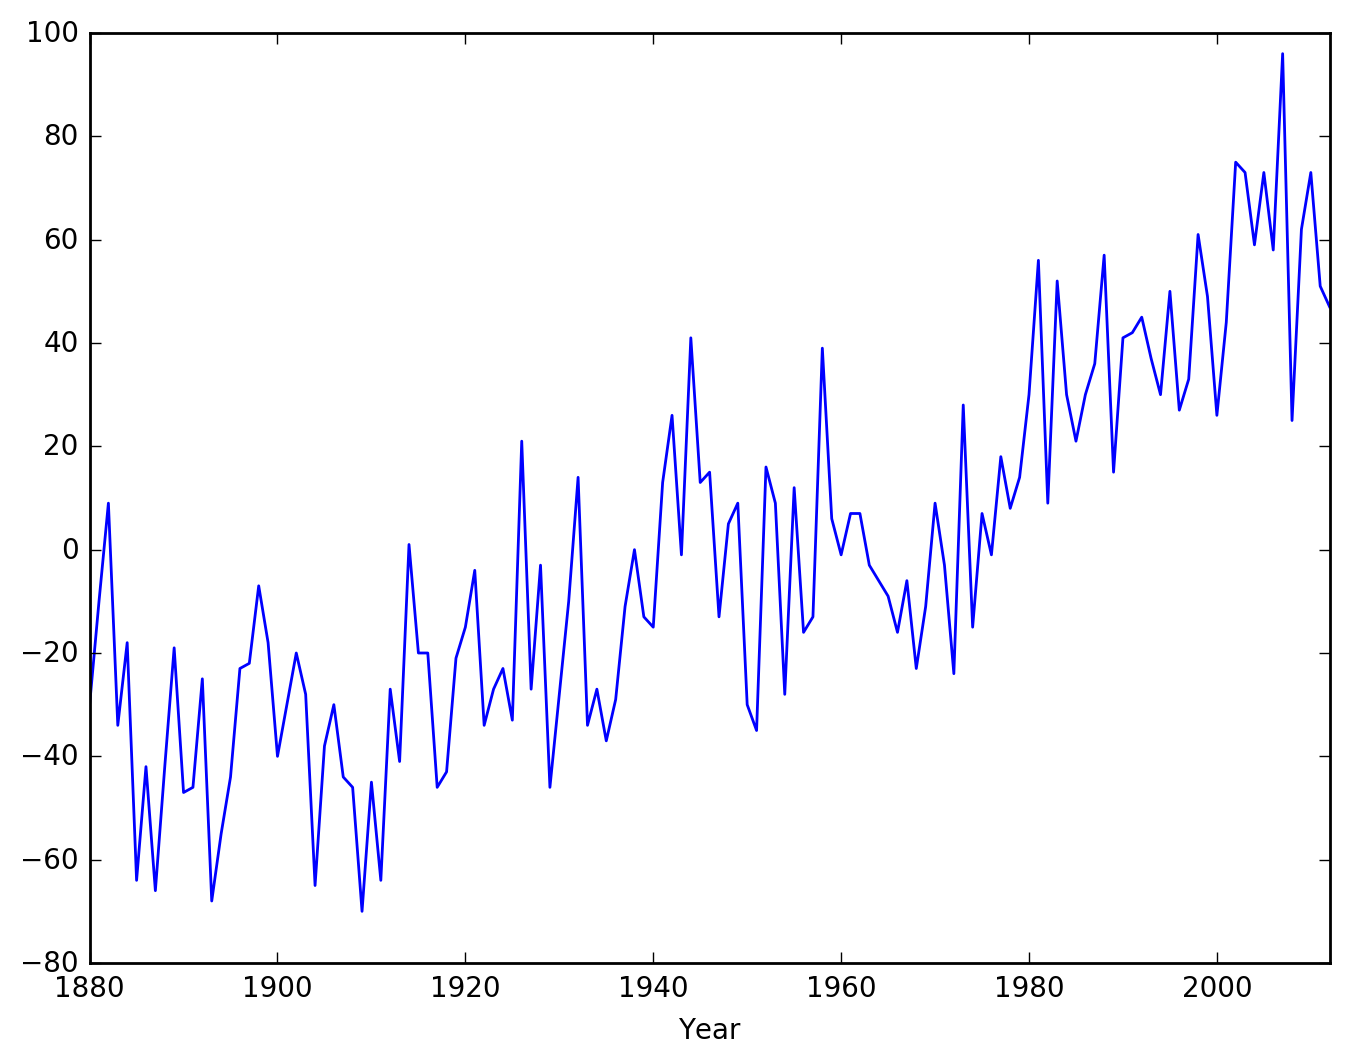

In [20]:
giss_temp.Jan.plot(figsize=LARGE_FIGSIZE)

/Users/ccruz/tools/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


{'boxes': [<matplotlib.lines.Line2D at 0x11d544a10>,
 'caps': [<matplotlib.lines.Line2D at 0x11d553950>,
 'fliers': [<matplotlib.lines.Line2D at 0x11d561c50>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11d561610>,
 'whiskers': [<matplotlib.lines.Line2D at 0x11d544c10>,
  <matplotlib.lines.Line2D at 0x11d6d7750>]}

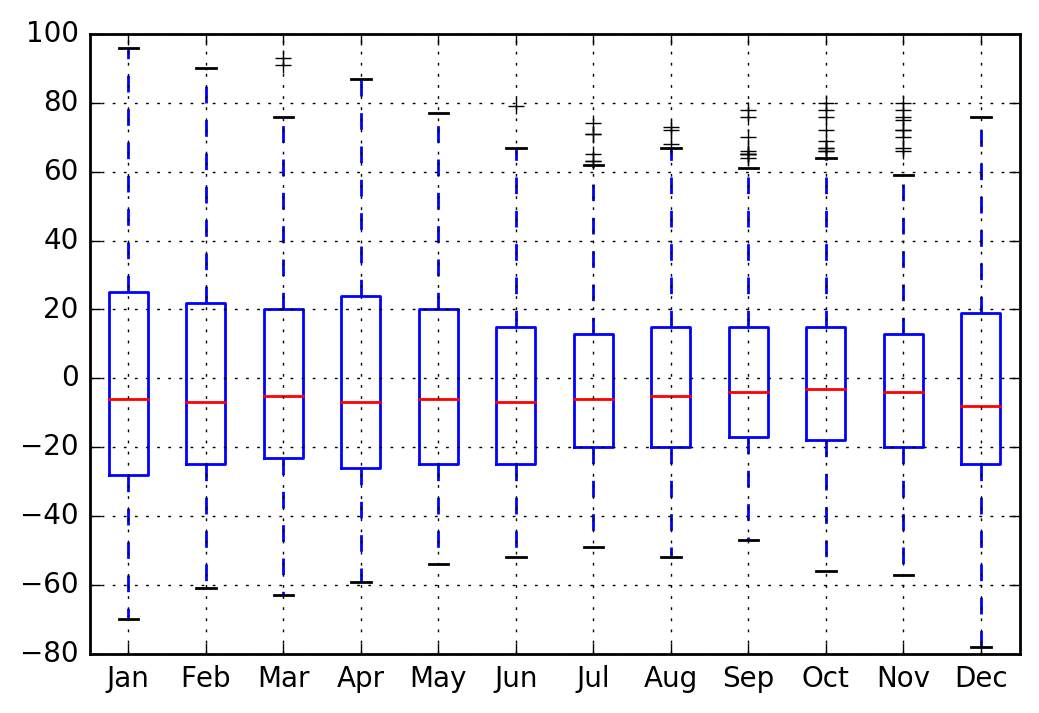

In [21]:
# A boxplot - all months
giss_temp.boxplot()

### Binary data

Data from [Sea Ice Concentrations from Nimbus-7 SMMR and DMSP SSM/I-SSMIS Passive Microwave Data](http://nsidc.org/data/nsidc-0051.html).

In [22]:
!wget ftp://sidads.colorado.edu/pub/DATASETS/nsidc0051_gsfc_nasateam_seaice/final-gsfc/north/monthly/nt_201512_f17_v1.1_n.bin

--2017-07-20 19:29:32--  ftp://sidads.colorado.edu/pub/DATASETS/nsidc0051_gsfc_nasateam_seaice/final-gsfc/north/monthly/nt_201512_f17_v1.1_n.bin
           => ‘nt_201512_f17_v1.1_n.bin.1’
Resolving sidads.colorado.edu... 128.138.135.20
Connecting to sidads.colorado.edu|128.138.135.20|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/DATASETS/nsidc0051_gsfc_nasateam_seaice/final-gsfc/north/monthly ... done.
==> SIZE nt_201512_f17_v1.1_n.bin ... 136492
==> PASV ... done.    ==> RETR nt_201512_f17_v1.1_n.bin ... done.
Length: 136492 (133K) (unauthoritative)

nt_201512_f17_v1.1_ 100%[===================>] 133.29K   346KB/s    in 0.4s    

2017-07-20 19:29:34 (346 KB/s) - ‘nt_201512_f17_v1.1_n.bin.1’ saved [136492]



In [23]:
ice = np.fromfile('nt_201512_f17_v1.1_n.bin', dtype='uint8')

We use *uint8* data type. 

[List of numpy data types](http://docs.scipy.org/doc/numpy/user/basics.types.html)

In [24]:
# The file format consists of a 300-byte descriptive header 
# followed by a two-dimensional array.
ice = ice[300:]

# Reshape
ice = ice.reshape(448,304)

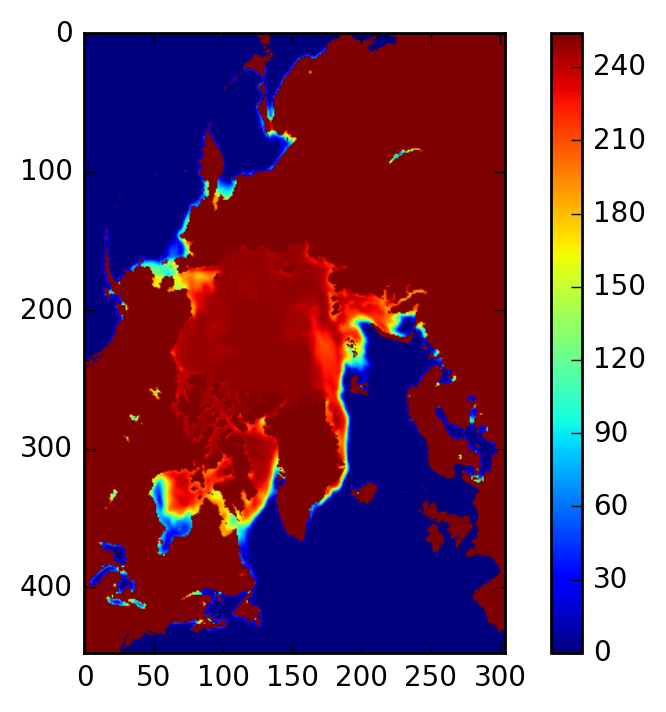

In [25]:
plt.imshow(ice)
plt.colorbar();

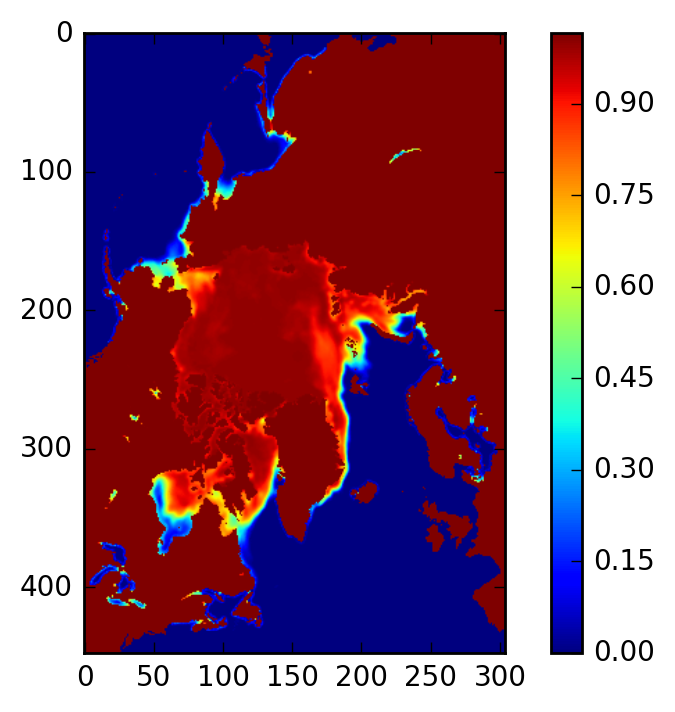

In [26]:
# To convert to the fractional parameter range of 0.0 to 1.0, 
# divide the scaled data in the file by 250.
ice = ice/250.
plt.imshow(ice)
plt.colorbar();

Exercise: Mask all land and missing values and re-plot.

### Open netCDF files

In [27]:
from netCDF4 import Dataset

Download [NCEP reanalysis data](http://www.esrl.noaa.gov/psd/data/reanalysis/reanalysis.shtml) daily air temperature for 2012.

In [28]:
!wget ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis/surface/air.sig995.2012.nc

--2017-07-20 19:29:57--  ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis/surface/air.sig995.2012.nc
           => ‘air.sig995.2012.nc’
Resolving ftp.cdc.noaa.gov... 140.172.38.117
Connecting to ftp.cdc.noaa.gov|140.172.38.117|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /Datasets/ncep.reanalysis/surface ... done.
==> SIZE air.sig995.2012.nc ... 22278402
==> PASV ... done.    ==> RETR air.sig995.2012.nc ... done.
Length: 22278402 (21M) (unauthoritative)

air.sig995.2012.nc  100%[===================>]  21.25M   467KB/s    in 42s     

2017-07-20 19:30:41 (515 KB/s) - ‘air.sig995.2012.nc’ saved [22278402]



In [29]:
fnc = Dataset('air.sig995.2012.nc')

In [30]:
fnc.description

u'Data is from NMC initialized reanalysis\n(4x/day).  These are the 0.9950 sigma level values.'

In [31]:
fnc.history

u'created 2011/12 by Hoop (netCDF2.3)\nConverted to chunked, deflated non-packed NetCDF4 2014/09'

In [32]:
fnc.variables

OrderedDict([(u'lat', <type 'netCDF4._netCDF4.Variable'>
              float32 lat(lat)
                  units: degrees_north
                  actual_range: [ 90. -90.]
                  long_name: Latitude
                  standard_name: latitude
                  axis: Y
              unlimited dimensions: 
              current shape = (73,)
              filling on, default _FillValue of 9.96920996839e+36 used),
             (u'lon', <type 'netCDF4._netCDF4.Variable'>
              float32 lon(lon)
                  units: degrees_east
                  long_name: Longitude
                  actual_range: [   0.   357.5]
                  standard_name: longitude
                  axis: X
              unlimited dimensions: 
              current shape = (144,)
              filling on, default _FillValue of 9.96920996839e+36 used),
             (u'time', <type 'netCDF4._netCDF4.Variable'>
              float64 time(time)
                  long_name: Time
                  delta

In [33]:
air = fnc.variables['air']

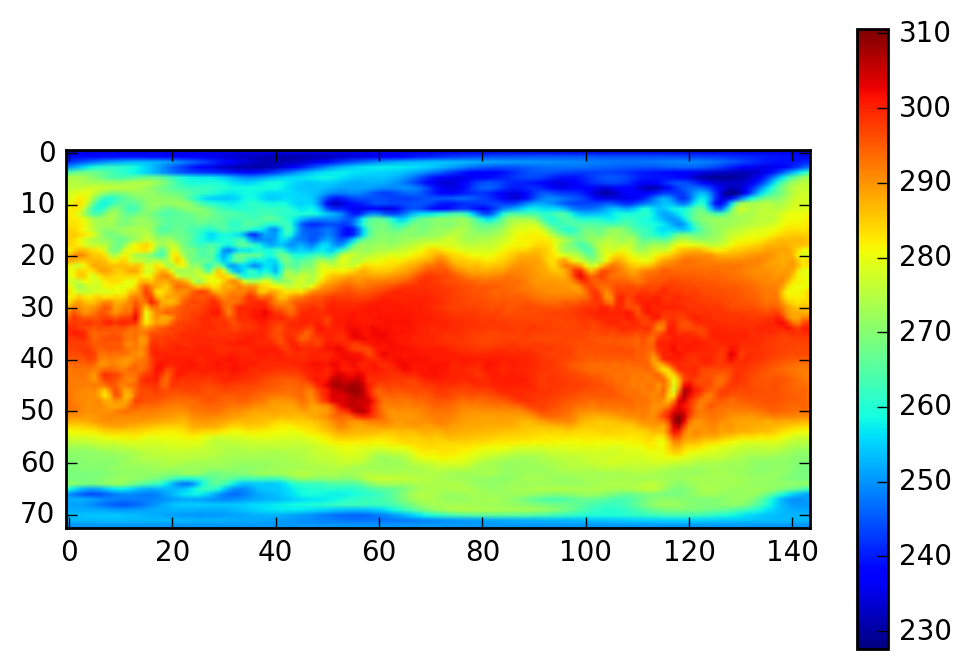

In [34]:
plt.imshow(air[0,:,:])
plt.colorbar();

### Examining an HDF5 file

The Hierarchical Data Format version 5 (HDF5), is an open file format that supports large, complex, heterogeneous data.

HDF5 uses a “file directory” like structure that allows you to organize data within the file in many different structured ways, as you might do with files on your computer. The HDF5 format also allows for embedding of metadata making it self-describing.

In [35]:
import h5py as h5

In [36]:
# Read H5 file
f = h5.File("NEONDSImagingSpectrometerData.h5", "r")
# Get and print list of datasets within the H5 file
datasetNames = [n for n in f.keys()]
for n in datasetNames:
    print(n)

Reflectance
fwhm
map info
spatialInfo
wavelength


In [37]:
# extract reflectance data from the H5 file
reflectance = f['Reflectance']
# extract one pixel from the data
reflectanceData = reflectance[:,49,392]
reflectanceData = reflectanceData.astype(float)

In [38]:
# divide the data by the scale factor
# note: this information would be accessed from the metadata
scaleFactor = 10000.0
reflectanceData /= scaleFactor
wavelength = f['wavelength']
wavelengthData = wavelength[:]
#transpose the data so wavelength values are in one column
wavelengthData = np.reshape(wavelengthData, 426)

In [39]:
# Print the attributes (metadata):
print("Data Description : ", reflectance.attrs['Description'])
print("Data dimensions : ", reflectance.shape, reflectance.attrs['DIMENSION_LABELS'])
# print a list of attributes in the H5 file
for n in reflectance.attrs:
    print(n)
# close the h5 file
f.close()

('Data Description : ', 'Atmospherically corrected reflectance.')
('Data dimensions : ', (426, 502, 477), array(['Wavelength', 'Line', 'Sample'], dtype=object))
row_col_band
DIMENSION_LABELS
Description
Unit
Scale Factor
data ignore value


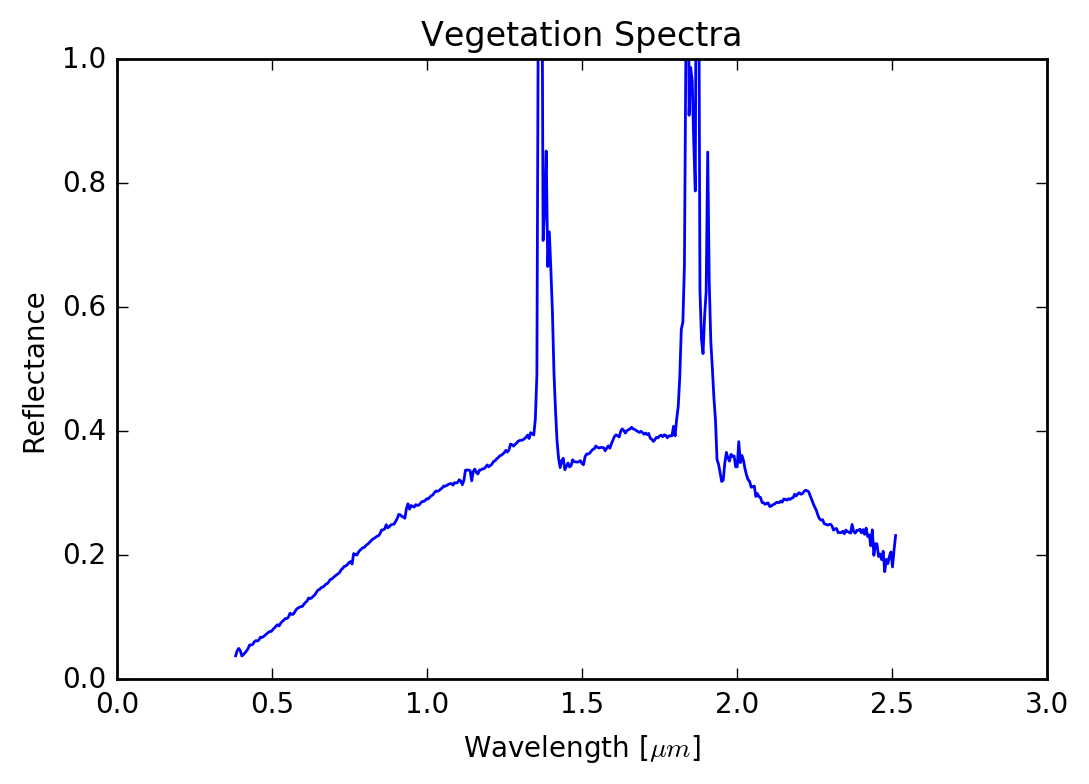

In [40]:
fig, ax = plt.subplots()
# Plot
ax.plot(wavelengthData, reflectanceData)
ax.set_title("Vegetation Spectra")
ax.set_ylabel('Reflectance')
ax.set_ylim((0,1))
ax.set_xlabel('Wavelength [$\mu m$]')
plt.show()

In [ ]:
# Write a new HDF file containing this spectrum
f = h5.File("VegetationSpectra.h5", "w")
rdata = f.create_dataset("VegetationSpectra", data=reflectanceData)
attrs = rdata.attrs
attrs.create("Wavelengths", data=wavelengthData)
f.close()